## Credit Card Fraud Detection:
This dataset is used to detect the credit card fraud detection. This is a classification problem. This is an imbalanced dataset based on target variable. So In this Project, I will use encoding and decording techniques to balanced dataset. 

## About Dataset:
Digital payments are evolving, but so are cyber crimes.
According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.
In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.
This Dataset sourced by some unnamed institute.

## Problem Statement:
* The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.
* In this project, we will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.
* The dataset is taken from the Kaggle website and it has a total of 1000,000 transactions,out of which 87403 are fraudulent. Since the dataset is imbalanced, so it needs to be handled before model building.

## Challenges:
This dataset is used to detect the credit card fraud detection. This is a classification problem. This is an imbalanced dataset based on target variable. So In this Project, I will use encoding and decording techniques to balanced dataset.

These are various techniques as follows -

* Logistics Regression
* Random Forest
* Decision Tree
* KNN
* NaiveBias

## Libraries:
* Numpy : for numerical computing (https://numpy.org/doc/stable/reference/?v=20230420065146)

* Pandas: for data manipulation and analysis (https://pandas.pydata.org/pandas-docs/stable/?v=20230420065146)

* Matplotlib and Seaborn: for data visualization (https://matplotlib.org/stable/users/index.html ,https://seaborn.pydata.org/#:~:text=Seaborn%20is%20a%20Python%20data,attractive%20and%20informative%20statistical%20graphics)

* Sklearn: It is a popular machine learning library in Python that provides a wide range of tools for data preprocessing, feature selection, model training, and model evaluation.(https://scikit-learn.org/stable/)

## Project Pipeline:
The project pipeline can be briefly summarized in the following steps:

#### Data Understanding: 
Here, we need to load the data and understand the features present in it. This would help us choose the features that we will need for your final model.
#### Exploratory data analytics (EDA):
Normally, in this step, we need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, we do not need to perform Z-scaling. However, you can check if there is any skewness in the data and try to mitigate it, as it might cause problems during the model-building phase.
##### Train/Test Split: 
Now we are familiar with the train/test split, which we can perform in order to check the performance of our models with unseen data. Here, for validation, we can use the k-fold cross-validation method. We need to choose an appropriate k value so that the minority class is correctly represented in the test folds.
#### Model-Building/Hyperparameter Tuning: 
This is the final step at which we can try different models and fine-tune their hyperparameters until we get the desired level of performance on the given dataset. We should try and see if we get a better model by the various sampling techniques.
#### Model Evaluation:
We need to evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced it is is more important to identify which are fraudulent transactions accurately than the non-fraudulent. We need to choose an appropriate evaluation metric which reflects this business goal.


## Importing Libraries and Dataset:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("card_transdata.csv")
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


## Exploratory Data Analysis (EDA):

* There are total of 8 columns: 3 continous, 4 categorical,and 1 target column
* There are 1000000 rows
* Fraud is the target variable
* No missing values

In [4]:
data.shape

(1000000, 8)

In [5]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

## Top 5 values

In [6]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## last 5 values

In [7]:
data.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0



## Feature Explanation:
distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

## Finding the information of the data:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


## Finding the Null Values in the Dataset:

In [9]:
data.isnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

There are no null values in this datset.

## Handling duplicated values:

In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(1000000, 8)

##  Basic statistics:

In [13]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


###  Outliers treatments:

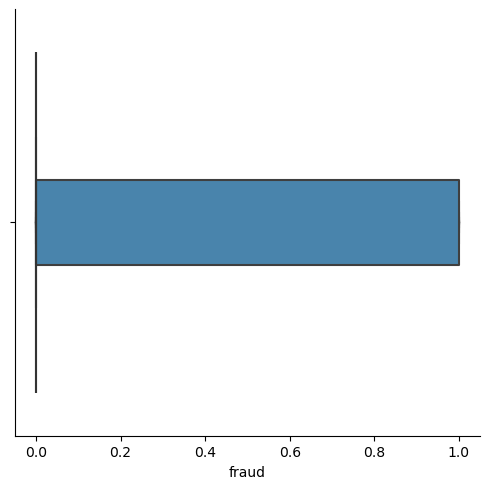

In [14]:
sns.catplot(x="fraud",kind="boxen",data=data)   ##box graph
plt.show()

In [15]:
y = data['fraud']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
removed_outliers

0         True
1         True
2         True
3         True
4         True
          ... 
999995    True
999996    True
999997    True
999998    True
999999    True
Name: fraud, Length: 1000000, dtype: bool

In [16]:
print(removed_outliers.value_counts())

True    1000000
Name: fraud, dtype: int64


There are no outliers.

## Value count of columns:

In [17]:
for i in data.columns:
  print(i, len(data[i].value_counts().index))

distance_from_home 1000000
distance_from_last_transaction 1000000
ratio_to_median_purchase_price 1000000
repeat_retailer 2
used_chip 2
used_pin_number 2
online_order 2
fraud 2


In [18]:
UsedChip = data['used_chip'].value_counts()

In [19]:
UsedChip.to_frame()

,used_chip
0.0,649601
1.0,350399


In [20]:
UsedPin=data['used_pin_number'].value_counts()

In [21]:
UsedPin.to_frame()

,used_pin_number
0.0,899392
1.0,100608


In [22]:
Fraud=data['fraud'].value_counts()
Fraud.to_frame()

,fraud
0.0,912597
1.0,87403


In [23]:
order=data['online_order'].value_counts()
order.to_frame()

,online_order
1.0,650552
0.0,349448


## Unique values of every columns:

In [24]:
data.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

## Data Insights:
In the given dataset, There are 87403 frauds which is 8.70% of given dataset.

In [25]:
fraud_c=pd.DataFrame(data["fraud"].value_counts())
fraud_c

,fraud
0.0,912597
1.0,87403


## "Categorical Variables"
 * Repeat Retailer: Most of the time transitions are in the same retailer.
 * Used Chip: Most of the time transitions are not using the chip, but we have a considerable number of transitions using the chip.
 * Used Pin Number: Most of the time transitions are not using the Pin Number.
 * Online Order: We have more Online Orders than Fisical.
 * Fraud: We have a few frauds in our database comparing to non frauds.

## Data Visualisation:

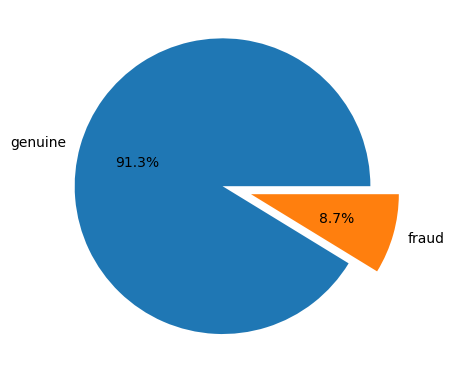

In [26]:
plt.pie(fraud_c["fraud"],labels=['genuine','fraud'],autopct='%.1f%%', explode=(0.2,0))
plt.show()

The dataset is heavily imbalanced. As it can be seen from the charts, number of fraud transactions are significantly low when compared to non-fraud transactions. 

### What Percent of Fraud Transactions Are Online?

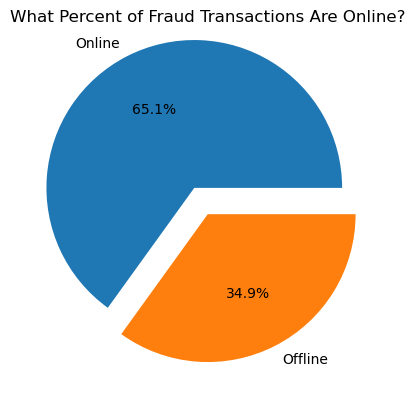

In [27]:
plt.pie(data["online_order"].value_counts(),labels=["Online","Offline"],autopct='%.1f%%', explode=(0.2,0))
plt.title("What Percent of Fraud Transactions Are Online?")
plt.show()


It shows maximum frauds have done by online which is 65.10% of given dataset.

### What Percentage of  frauds  happened using Pins?

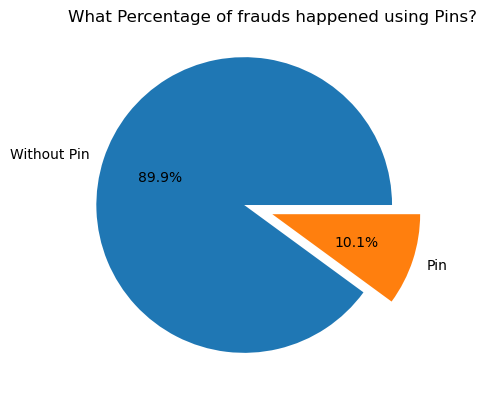

In [28]:
plt.pie(data['used_pin_number'].value_counts(),labels=["Without Pin","Pin"],autopct='%.1f%%', explode=(0.2,0))
plt.title("What Percentage of frauds happened using Pins?")
plt.show()

In [29]:
order=data['repeat_retailer'].value_counts()
order.to_frame()

,repeat_retailer
1.0,881536
0.0,118464


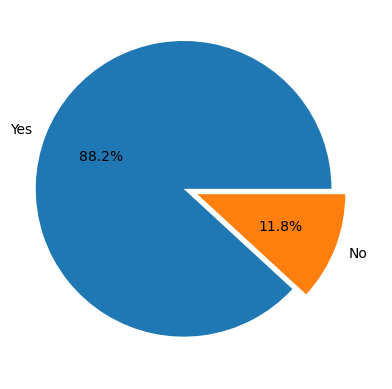

In [30]:
plt.pie(data["repeat_retailer"].value_counts(),labels=['Yes','No'],autopct='%.1f%%', explode=(0.1,0))
plt.show()  

## Bivariate Analysis:
When we compare our variable target with others categorical variables, we can see some insights:

Most of the frauds are in the same retailer in a online purchase, without using the chip and without using the pin.¶

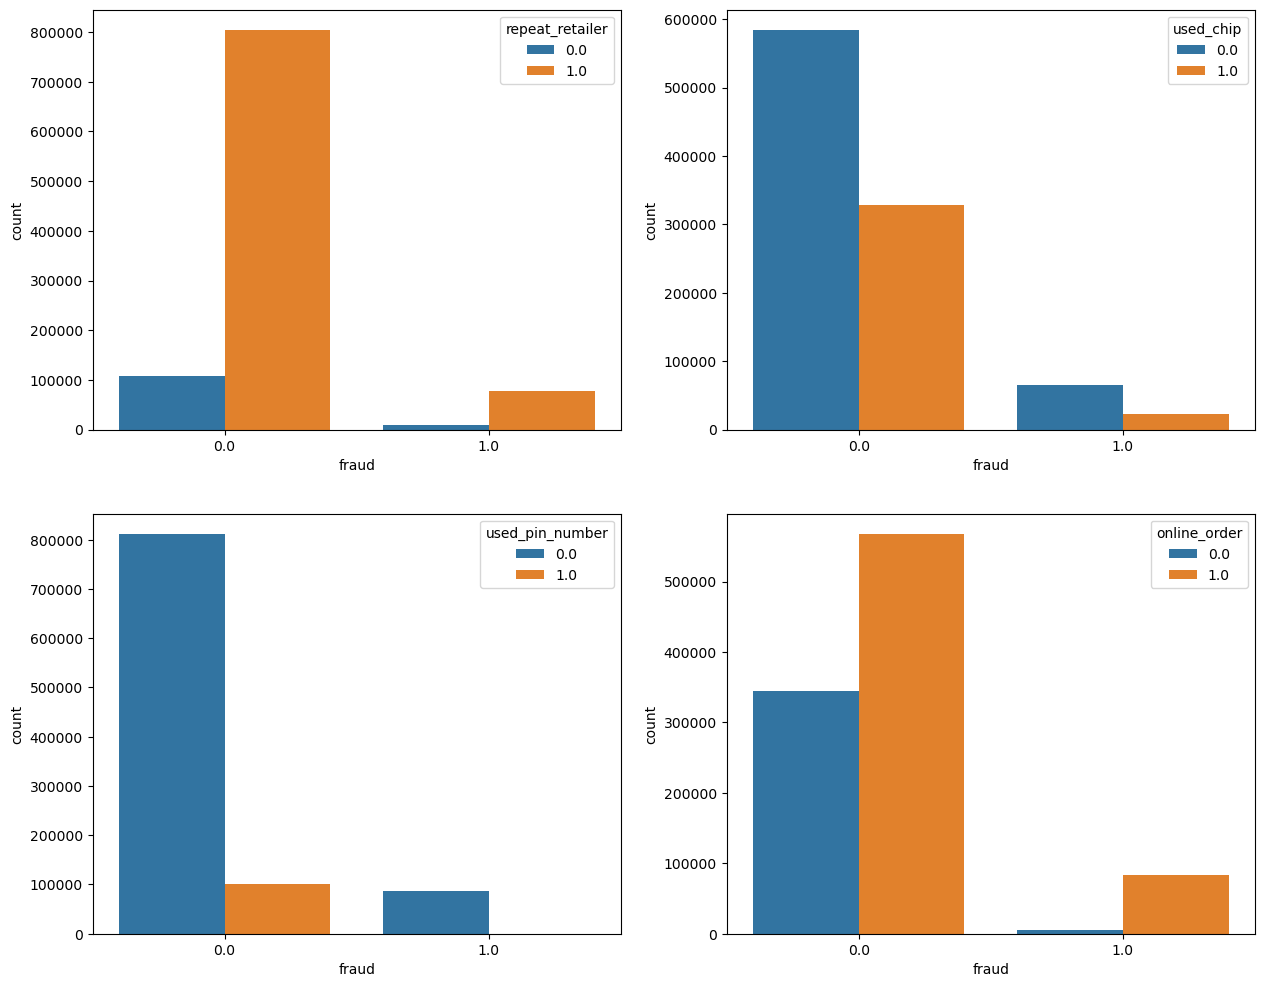

In [31]:
plt.figure(figsize = (15,12))

plt.subplot(2,2,1)
sns.countplot(x = 'fraud', hue= 'repeat_retailer', data = data)

plt.subplot(2,2,2)
sns.countplot(x = 'fraud', hue= 'used_chip', data = data)

plt.subplot(2,2,3)
sns.countplot(x = 'fraud', hue= 'used_pin_number', data = data)

plt.subplot(2,2,4)
sns.countplot(x = 'fraud', hue= 'online_order', data = data)
plt.show()

### Continuous Variables:
* Distance from home: Most of the time transitions are close to home.
* Distance from last transition: Most of the time transitions are close to the last transition.
* Ratio to Median Purchase time: Most of the time transitions are not much diferent than average.

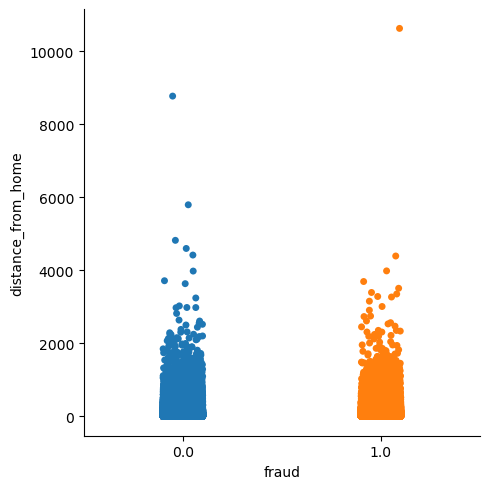

In [32]:
sns.catplot(x = "fraud", y = "distance_from_home", data = data)
plt.show()

When we compare our variable target with the variable Distance From Home we can see that we don't have a big difference, it's almost a same pattern.¶

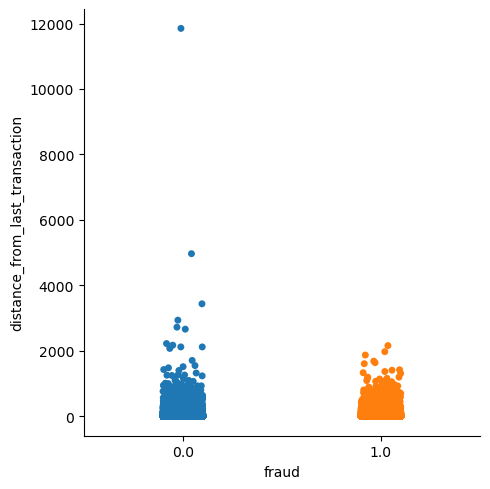

In [33]:
sns.catplot(x = "fraud", y = "distance_from_last_transaction",  data = data)
plt.show()

When we compare our variable target with the variable Distance From Last Transiction we can see that we don't have a big difference, it's almost a same pattern,

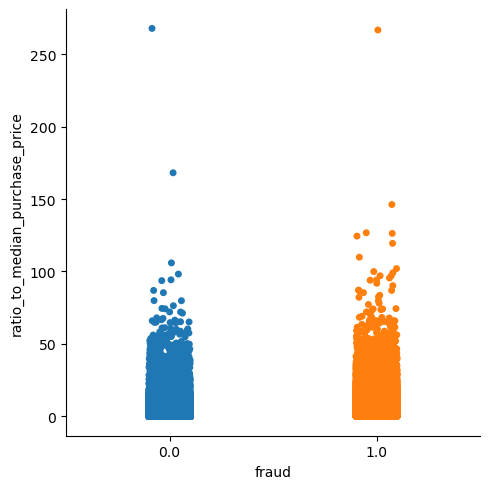

In [34]:
sns.catplot(x = "fraud", y = "ratio_to_median_purchase_price",  data = data)
plt.show()

When we compare our target variable with the Ratio to Median Purchase Time variable we can see that we have more frauds when the purchase value is far from the Median.¶

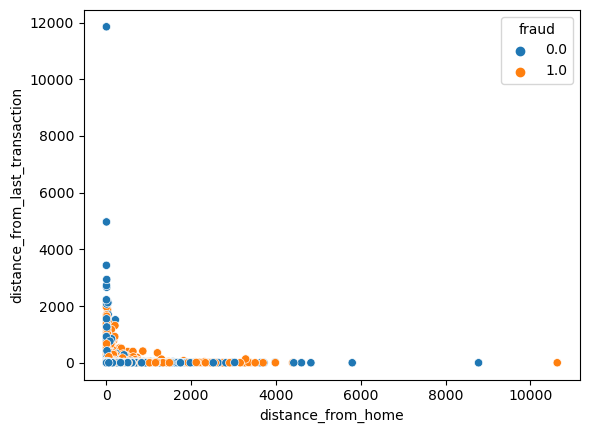

In [35]:
sns.scatterplot(x='distance_from_home', y='distance_from_last_transaction', data=data, hue='fraud')
plt.show()

## Making Dataset small just for Visualisation:

In [36]:
data_new = data.sample(n=10000, random_state=42)

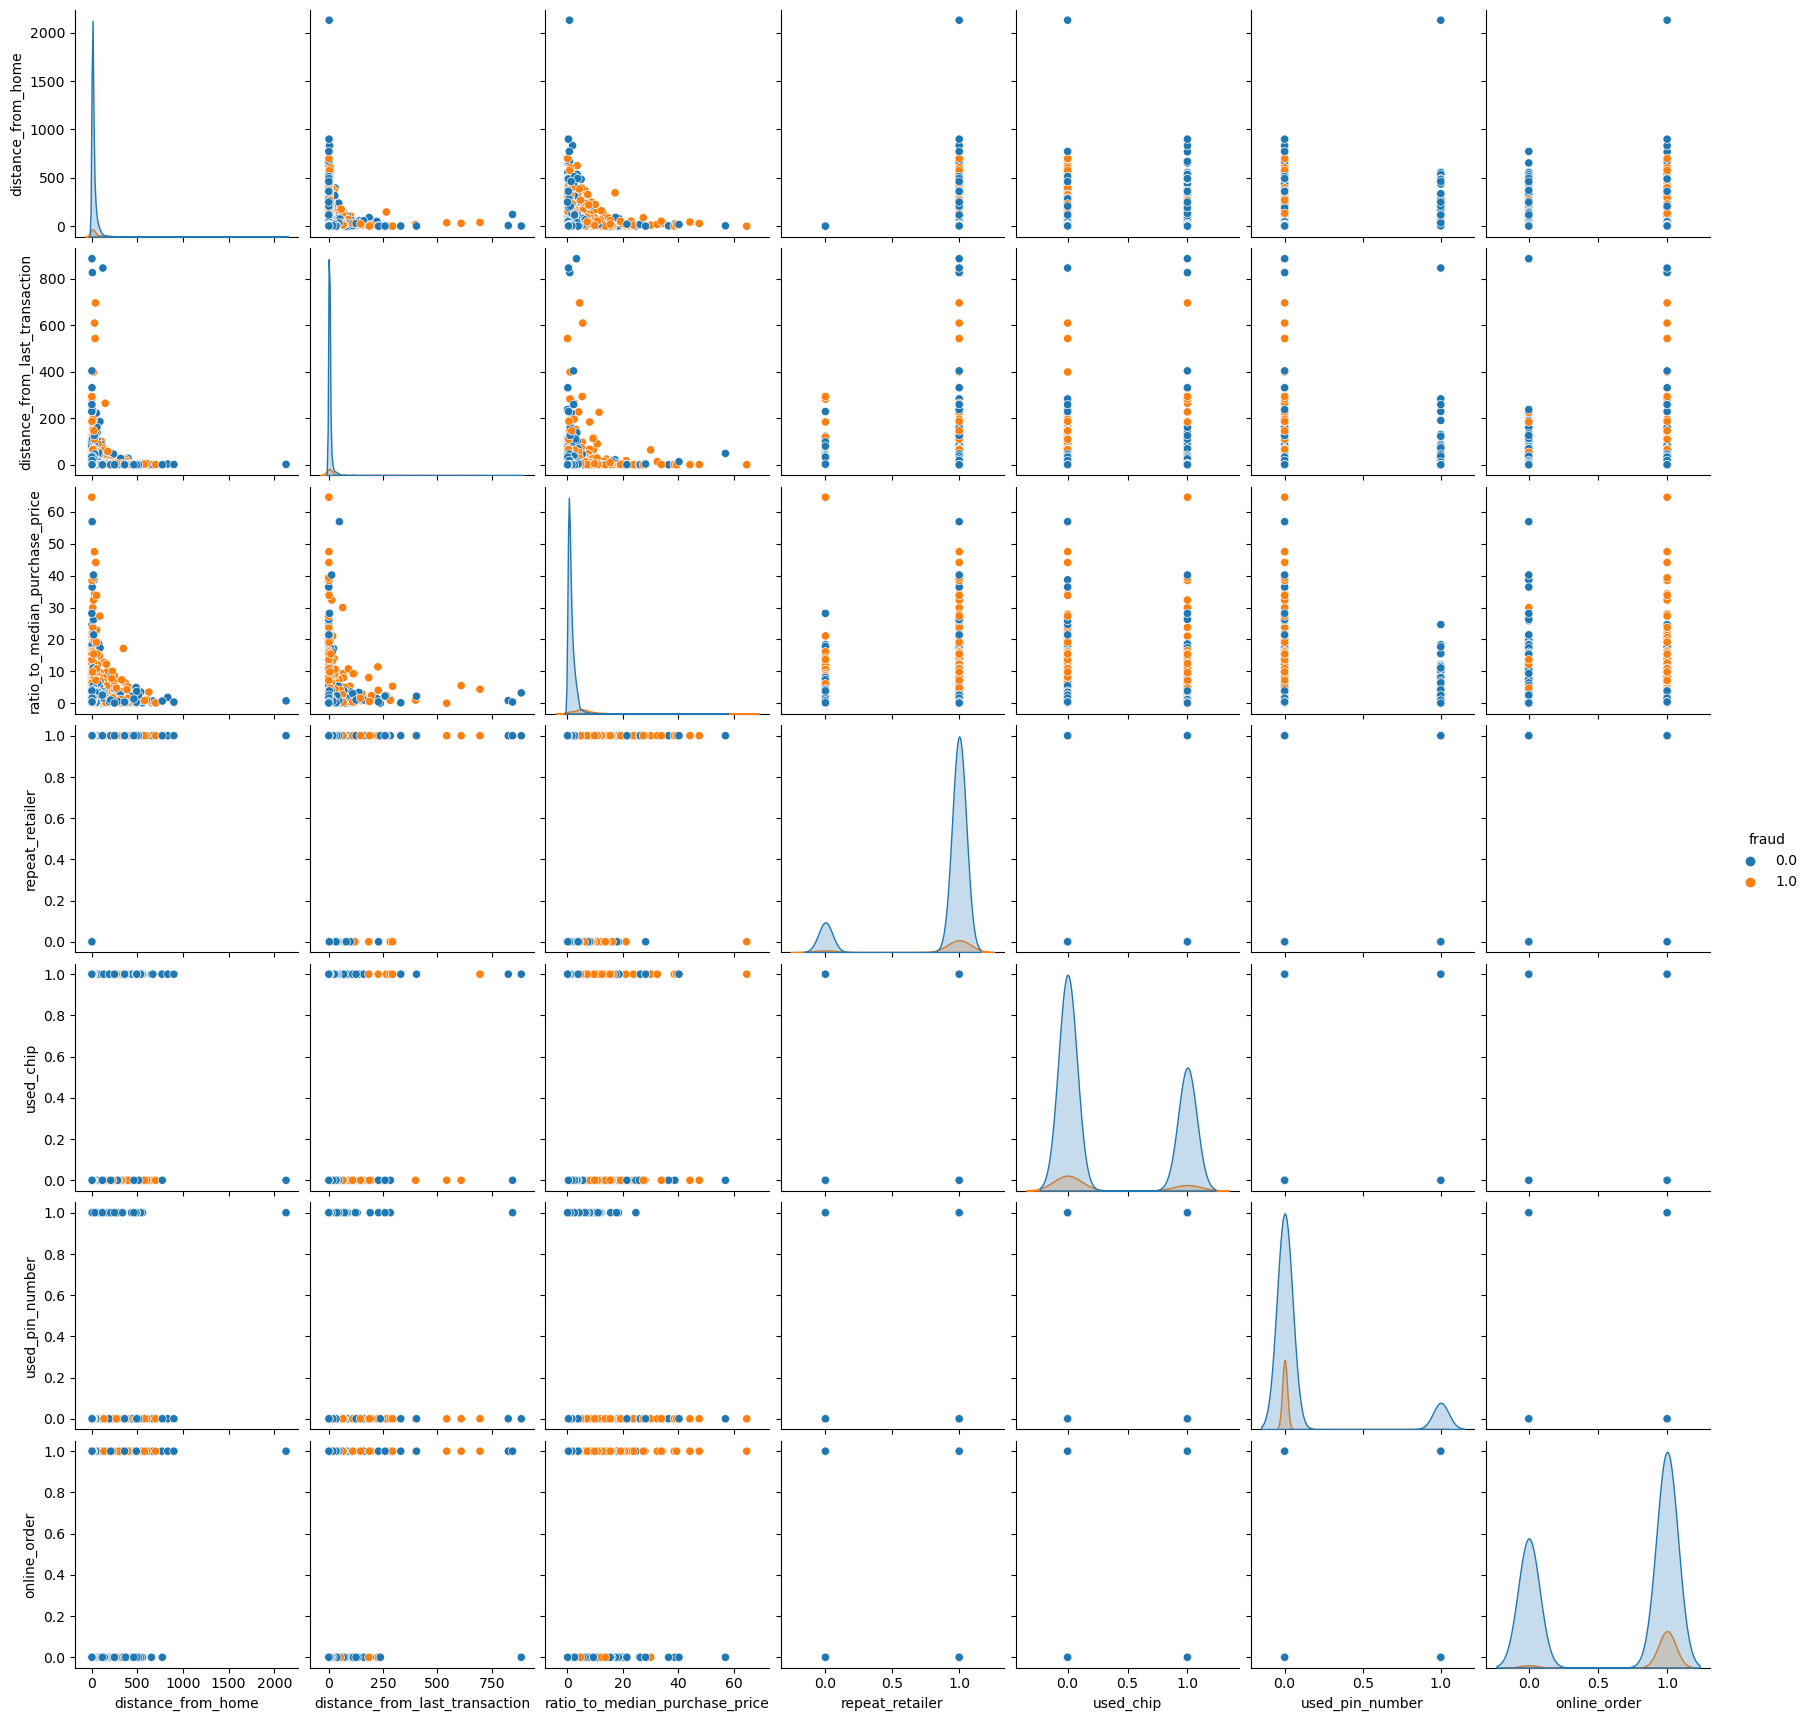

In [37]:
sns.pairplot(data_new ,hue='fraud')
plt.show()

## Correlation:

In [38]:
data.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


Verifying the correlation between our variables, here we can see that we don't have a strong correlation.¶

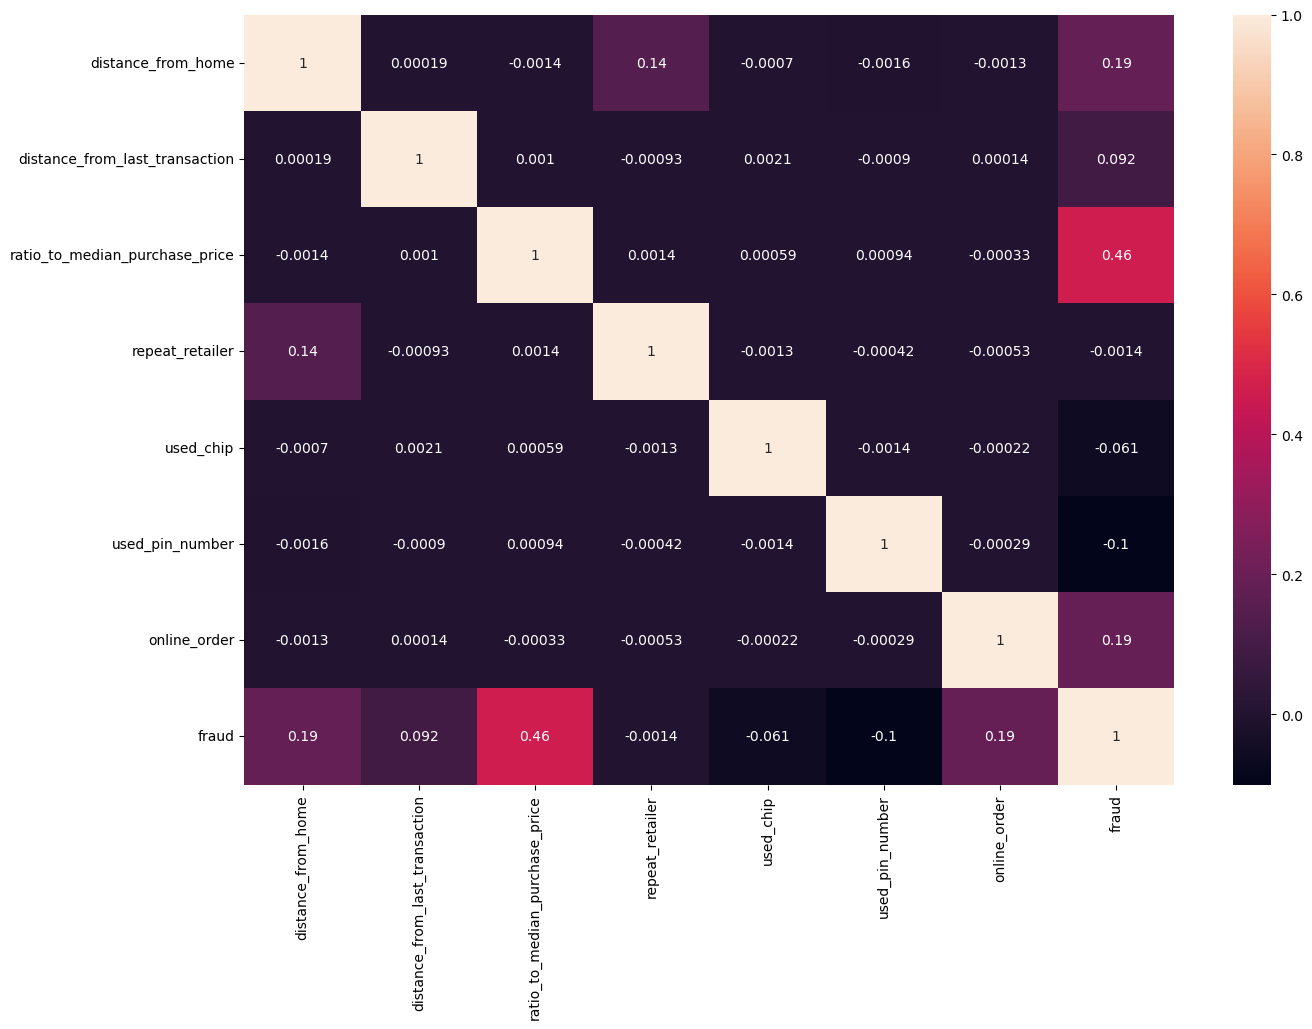

In [39]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot=True)

plt.show()

Most correlation values are very close to 0, which indicates that our features are weakly correlated

##### Putting feature variables into X

In [40]:
X=data.drop(["fraud"], axis = 1)

##### Putting target variable to y

In [41]:
Y=data["fraud"]

## Splitting the Dataset into Train & Test:

In [42]:
# Import library
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(700000, 7)
(300000, 7)
(700000,)
(300000,)


## Logistic Regression:

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [47]:
model1=LogisticRegression()

In [48]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [49]:
y_pred=model1.predict(X_test)

In [50]:
model1.score(X_train,Y_train)*100   

95.80042857142857

In [51]:
model1.score(X_test,Y_test)*100

95.80300000000001


Accuracy for Logistic Regression = 95.80300000000001


Classification_report :-

               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273638
         1.0       0.89      0.60      0.72     26362

    accuracy                           0.96    300000
   macro avg       0.92      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000



Confusion_Matrix : 



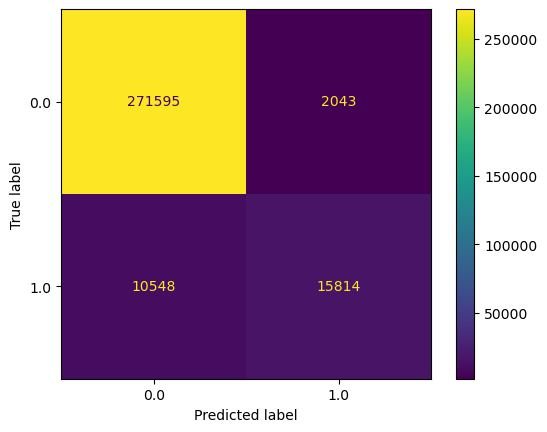

In [52]:
accuracy1=accuracy_score(Y_test, y_pred)*100
print('\nAccuracy for Logistic Regression =',accuracy1)
print('\n\nClassification_report :-\n\n',classification_report(Y_test, y_pred))
print('\n\nConfusion_Matrix : \n')
plot_confusion_matrix(model1,X_test,Y_test)
plt.show()

#### Pretty nice! detected 95.7% of the fraudulent transactions! But also falsely classified 4.30% of the non-fraud transactions as fraudulent. Let's use other method to find a more balanced threshold.

## DecisionTreeClassifier:

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model2=DecisionTreeClassifier()

In [55]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [56]:
y_pred = model2.predict(X_test)

In [57]:
accuracy2=accuracy_score(Y_test, y_pred)*100
accuracy2

100.0


Accuracy for Decision Tree Classifier = 100.0


Classification_report :-

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273638
         1.0       1.00      1.00      1.00     26362

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



Confusion_Matrix :-



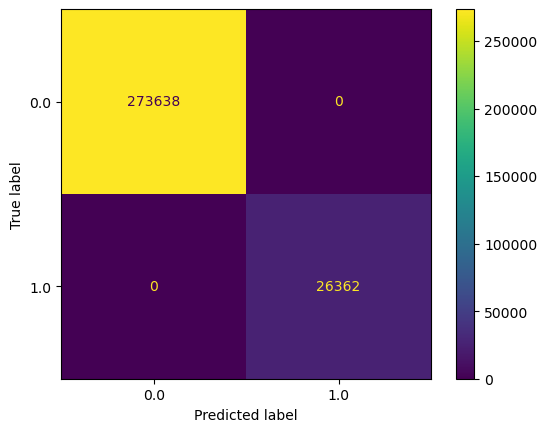

In [58]:
print('\nAccuracy for Decision Tree Classifier =',accuracy2)
print('\n\nClassification_report :-\n\n',classification_report(Y_test, y_pred))
print('\n\nConfusion_Matrix :-\n')
plot_confusion_matrix(model2,X_test,Y_test)
plt.show()

Decision Tree method fit the dataset incredibly with  100% accuracy. It is very remarkable that there are only 1 false positives and 8 false negatives.

## RandomForestClassifier:

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model3=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)

In [61]:
model3.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [62]:
y_pred = model3.predict(X_test)

In [63]:
accuracy3=accuracy_score(Y_test, y_pred)*100
accuracy3

99.99766666666666


Accuracy for Random Forest Classifier = 99.99766666666666


Classification_report :-

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273638
         1.0       1.00      1.00      1.00     26362

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



Confusion_Matrix :-



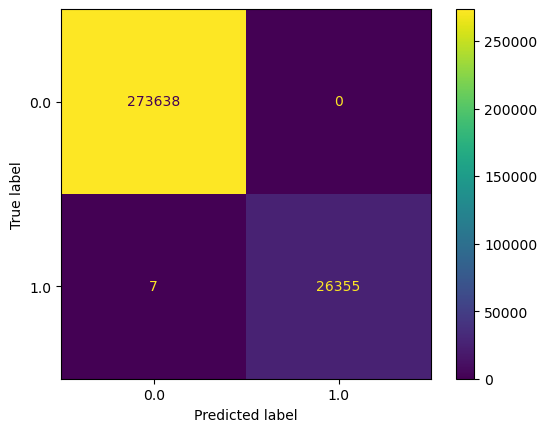

In [64]:
print('\nAccuracy for Random Forest Classifier =',accuracy3)
print('\n\nClassification_report :-\n\n',classification_report(Y_test, y_pred))
print('\n\nConfusion_Matrix :-\n')
plot_confusion_matrix(model3,X_test,Y_test)
plt.show()

AWESOME! 100% detection !! Random Forest wins this race!!

## GaussianNB:

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
model4 = GaussianNB()

In [67]:
model4.fit(X_train,Y_train)

GaussianNB()

In [68]:
y_pred = model4.predict(X_test)

In [69]:
model4.score(X_train,Y_train)

0.9484685714285714

In [70]:
model4.score(X_test,Y_test)

0.9481966666666667

In [71]:
accuracy4 =accuracy_score(Y_test,y_pred)*100
accuracy4

94.81966666666666


Accuracy for Gaussian NB = 94.81966666666666


Classification_report :-

               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    273638
         1.0       0.78      0.58      0.66     26362

    accuracy                           0.95    300000
   macro avg       0.87      0.78      0.82    300000
weighted avg       0.94      0.95      0.94    300000



Confusion_Matrix :-



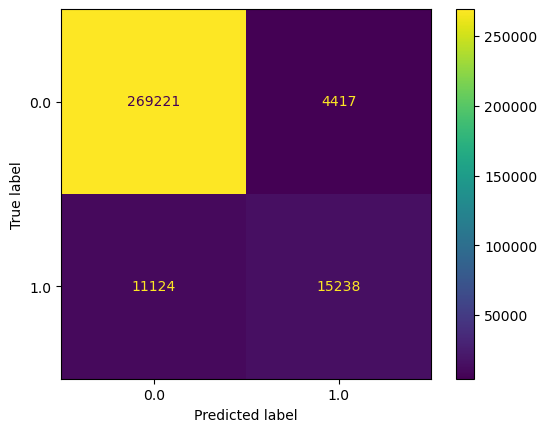

In [72]:

print('\nAccuracy for Gaussian NB =',accuracy4)
print('\n\nClassification_report :-\n\n',classification_report(Y_test, y_pred))
print('\n\nConfusion_Matrix :-\n')
plot_confusion_matrix(model4,X_test,Y_test)
plt.show()

Here we have 94.8% accuracy, this is a very good model to use to visualize when it's a fraud and it's a good model to see if it's not a fraud too.

## KNeighborsClassifier:

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
model5 = KNeighborsClassifier(n_neighbors=3)

In [75]:
model5.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
model5.score(X_train,Y_train)*100

99.34228571428572

In [77]:
y_pred=model5.predict(X_test)

In [78]:
accuracy5=accuracy_score(Y_test, y_pred)*100
accuracy5

98.39466666666667


Accuracy for KNN = 98.39466666666667


Classification_report :-

               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    273638
         1.0       0.90      0.93      0.91     26362

    accuracy                           0.98    300000
   macro avg       0.94      0.96      0.95    300000
weighted avg       0.98      0.98      0.98    300000



Confusion_Matrix :-



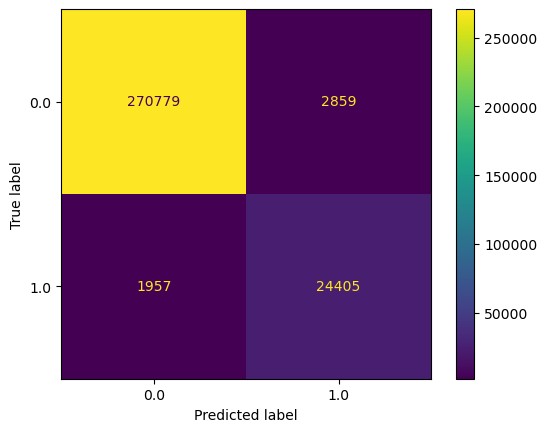

In [79]:
print('\nAccuracy for KNN =',accuracy5)
print('\n\nClassification_report :-\n\n',classification_report(Y_test, y_pred))
print('\n\nConfusion_Matrix :-\n')
plot_confusion_matrix(model5,X_test,Y_test)
plt.show()

 here we have 98.4% accuracy, this is a very good model to use to visualize when it's a fraud and it's a good model to see if it's not a fraud too.

## Comparing Accuracy of All Models:

In [80]:
print('Accuracy for Logistic Regression =',accuracy1)
print('Accuracy for Decision Tree Classifier =',accuracy2)
print('Accuracy for Random Forest Classifier =',accuracy3)
print('Accuracy for Gaussian NB =',accuracy4)
print('Accuracy for KNN =',accuracy5)


Accuracy for Logistic Regression = 95.80300000000001
Accuracy for Decision Tree Classifier = 100.0
Accuracy for Random Forest Classifier = 99.99766666666666
Accuracy for Gaussian NB = 94.81966666666666
Accuracy for KNN = 98.39466666666667


In [81]:
## Quick Summary Using Pandas_profiling

In [82]:
import pandas_profiling as pp
report = data.profile_report()
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [83]:
report.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Conclusion: 
In this project we can see that we have numerical variables and our categorical variables is already encoded, in our Data Visualization we can get some good insights
When we look to Machine Learning Models most of them has a good precision but not all can visualize if it's a fraud or no.
Other interesting thing to see is the most important variables in the Decision Tree Model, We can see that the most important variable of model is ratio_to_median_purchase_price, which shows that when it is a fraud, it is likely that the purchase price will have a large variance than normal
###  Best Models to use with Best Accuracy score:

- Decision Tree
- Random Forest
- KNN

###  Models with Good Accuracy:
- Naive Bayes
- Logistic Regression


#### The best model we have when we analyze the dataset, are the Random Forest and Decision Tree model ,in which we get 99.99% accuracy.

### Guided By- Shalini kumari
### Submitted By- Shalinee kumari